
# PyCaret Multiclass Classification Tutorial



# Installation


In [ ]:
!pip install pycaret[full]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.3/105.3 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.6/41.6 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 10.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 58.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of selenium to determine which version is compatible with other requirements. This 

In [ ]:
# check installed version
import pycaret
pycaret.__version__

'3.3.2'

#  Quick start

PyCaret’s Classification Module is a supervised machine learning module that is used for classifying elements into groups. The goal is to predict the categorical class labels which are discrete and unordered.


A typical workflow in PyCaret consist of following 5 steps in this order:

## **Setup** ➡️ **Compare Models** ➡️ **Analyze Model** ➡️ **Prediction** ➡️ **Save Model**

In [ ]:
# loading sample dataset from pycaret dataset module
from pycaret.datasets import get_data
data = get_data('wine')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


## Setup
This function initializes the training environment and creates the transformation pipeline. Setup function must be called before executing any other function in PyCaret. It only has two required parameters i.e. `data` and `target`. All the other parameters are optional.

In [ ]:
# import pycaret classification and init setup
from pycaret.classification import *
s = setup(data, target = 'quality', session_id = 123)

,Description,Value
0,Session id,123
1,Target,quality
2,Target type,Multiclass
3,Target mapping,"3: 0, 4: 1, 5: 2, 6: 3, 7: 4, 8: 5, 9: 6"
4,Original data shape,"(6497, 13)"
5,Transformed data shape,"(6497, 13)"
6,Transformed train set shape,"(4547, 13)"
7,Transformed test set shape,"(1950, 13)"
8,Numeric features,11
9,Categorical features,1


Once the setup has been successfully executed it shows the information grid containing experiment level information.

- **Session id:**  A pseudo-random number distributed as a seed in all functions for later reproducibility. If no `session_id` is passed, a random number is automatically generated that is distributed to all functions.<br/>
<br/>
- **Target type:**  Binary, Multiclass, or Regression. The Target type is automatically detected. <br/>
<br/>
- **Label Encoding:**  When the Target variable is of type string (i.e. 'Yes' or 'No') instead of 1 or 0, it automatically encodes the label into 1 and 0 and displays the mapping (0 : No, 1 : Yes) for reference. In this tutorial, no label encoding is required since the target variable is of numeric type. <br/>
<br/>
- **Original data shape:**  Shape of the original data prior to any transformations. <br/>
<br/>
- **Transformed train set shape :**  Shape of transformed train set <br/>
<br/>
- **Transformed test set shape :**  Shape of transformed test set <br/>
<br/>
- **Numeric features :**  The number of features considered as numerical. <br/>
<br/>
- **Categorical features :**  The number of features considered as categorical. <br/>

PyCaret has two set of API's that you can work with. (1) Functional (as seen above) and (2) Object Oriented API.

With Object Oriented API instead of executing functions directly you will import a class and execute methods of class.

In [ ]:
# import ClassificationExperiment and init the class
from pycaret.classification import ClassificationExperiment
exp = ClassificationExperiment()

In [ ]:
# check the type of exp
type(exp)

pycaret.classification.oop.ClassificationExperiment

In [ ]:
# init setup on exp
exp.setup(data, target = 'quality', session_id = 123)

,Description,Value
0,Session id,123
1,Target,quality
2,Target type,Multiclass
3,Target mapping,"3: 0, 4: 1, 5: 2, 6: 3, 7: 4, 8: 5, 9: 6"
4,Original data shape,"(6497, 13)"
5,Transformed data shape,"(6497, 13)"
6,Transformed train set shape,"(4547, 13)"
7,Transformed test set shape,"(1950, 13)"
8,Numeric features,11
9,Categorical features,1


You can use any of the two method i.e. Functional or OOP and even switch back and forth between two set of API's. The choice of method will not impact the results and has been tested for consistency.

## Compare Models

This function trains and evaluates the performance of all the estimators available in the model library using cross-validation. The output of this function is a scoring grid with average cross-validated scores. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [ ]:
# compare baseline models
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.6706,0.3407,0.6706,0.6694,0.6544,0.4834,0.4896,1.1410
et,Extra Trees Classifier,0.6620,0.3427,0.6620,0.6627,0.6472,0.4700,0.4762,0.6510
lightgbm,Light Gradient Boosting Machine,0.6525,0.3316,0.6525,0.6449,0.6401,0.4614,0.4646,2.5610
catboost,CatBoost Classifier,0.6488,0.3299,0.6488,0.6437,0.6357,0.4537,0.4574,16.7080
xgboost,Extreme Gradient Boosting,0.6464,0.3303,0.6464,0.6373,0.6346,0.4528,0.4558,1.0860
gbc,Gradient Boosting Classifier,0.5828,0.0000,0.5828,0.5725,0.5639,0.3424,0.3491,5.9020
dt,Decision Tree Classifier,0.5762,0.2728,0.5762,0.5785,0.5763,0.3707,0.3712,0.1880
lda,Linear Discriminant Analysis,0.5399,0.0000,0.5399,0.5185,0.5142,0.2670,0.2742,0.1390
lr,Logistic Regression,0.5390,0.0000,0.5390,0.4958,0.4897,0.2445,0.2593,2.0880
ridge,Ridge Classifier,0.5355,0.0000,0.5355,0.4751,0.4676,0.2293,0.2481,0.0700


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [ ]:
# compare models using OOP
exp.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.6706,0.3407,0.6706,0.6694,0.6544,0.4834,0.4896,0.9430
et,Extra Trees Classifier,0.6620,0.3427,0.6620,0.6627,0.6472,0.4700,0.4762,0.9980
lightgbm,Light Gradient Boosting Machine,0.6525,0.3316,0.6525,0.6449,0.6401,0.4614,0.4646,2.7490
catboost,CatBoost Classifier,0.6488,0.3299,0.6488,0.6437,0.6357,0.4537,0.4574,17.0310
xgboost,Extreme Gradient Boosting,0.6464,0.3303,0.6464,0.6373,0.6346,0.4528,0.4558,0.8780
gbc,Gradient Boosting Classifier,0.5828,0.0000,0.5828,0.5725,0.5639,0.3424,0.3491,5.6590
dt,Decision Tree Classifier,0.5762,0.2728,0.5762,0.5785,0.5763,0.3707,0.3712,0.1110
lda,Linear Discriminant Analysis,0.5399,0.0000,0.5399,0.5185,0.5142,0.2670,0.2742,0.0750
lr,Logistic Regression,0.5390,0.0000,0.5390,0.4958,0.4897,0.2445,0.2593,1.7080
ridge,Ridge Classifier,0.5355,0.0000,0.5355,0.4751,0.4676,0.2293,0.2481,0.1200


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False)

Notice that the output between functional and OOP API is consistent. Rest of the functions in this notebook will only be shown using functional API only.

## Analyze Model

You can use the `plot_model` function to analyzes the performance of a trained model on the test set. It may require re-training the model in certain cases.

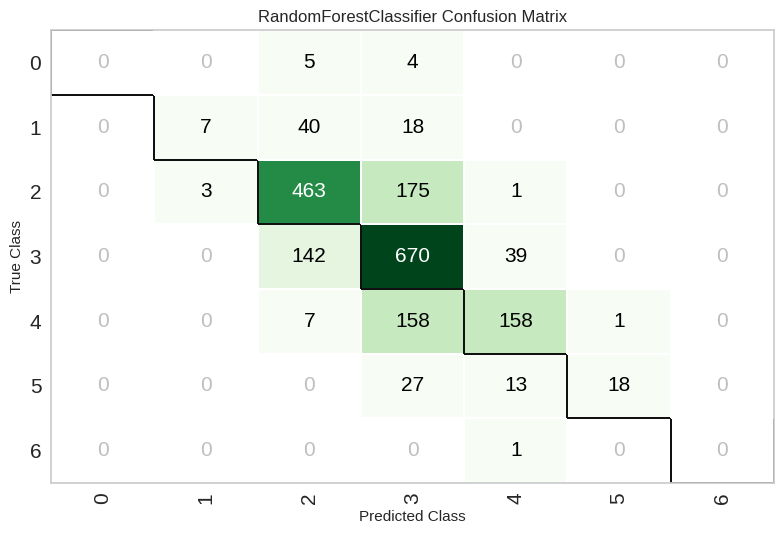

In [ ]:
# plot confusion matrix
plot_model(best, plot = 'confusion_matrix')

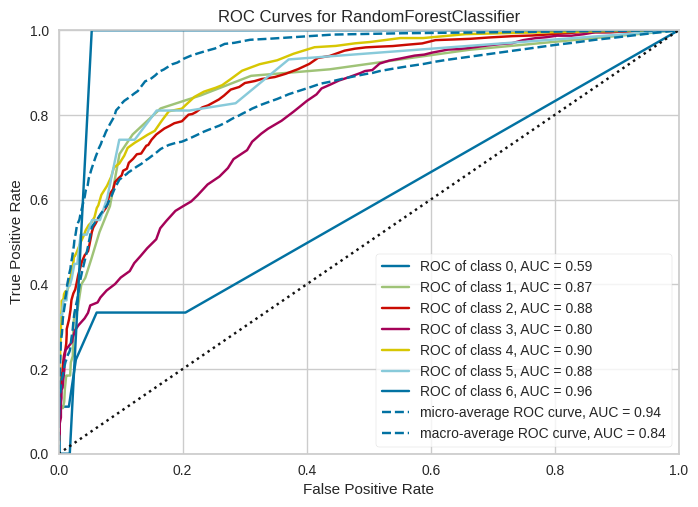

In [ ]:
# plot AUC
plot_model(best, plot = 'auc')

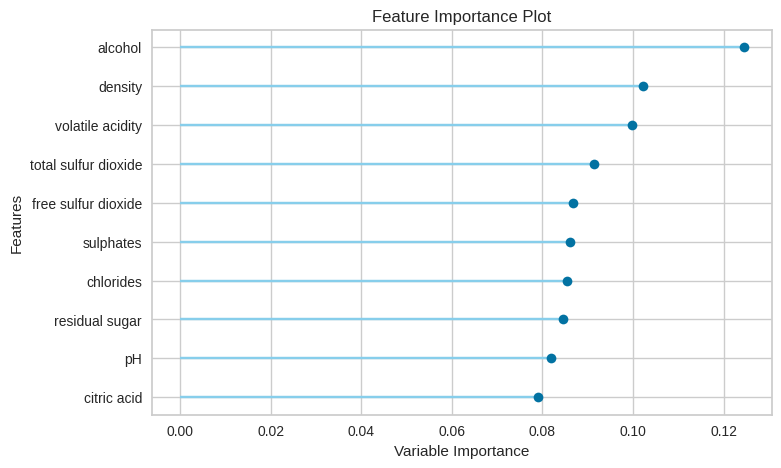

In [ ]:
# plot feature importance
plot_model(best, plot = 'feature')

In [ ]:
# check docstring to see available plots
help(plot_model)

Help on function plot_model in module pycaret.classification.functional:

plot_model(estimator, plot: str = 'auc', scale: float = 1, save: bool = False, fold: Union[int, Any, NoneType] = None, fit_kwargs: Optional[dict] = None, plot_kwargs: Optional[dict] = None, groups: Union[str, Any, NoneType] = None, verbose: bool = True, display_format: Optional[str] = None) -> Optional[str]
    This function analyzes the performance of a trained model on holdout set.
    It may require re-training the model in certain cases.
    
    Example
    -------
    >>> from pycaret.datasets import get_data
    >>> juice = get_data('juice')
    >>> from pycaret.classification import *
    >>> exp_name = setup(data = juice,  target = 'Purchase')
    >>> lr = create_model('lr')
    >>> plot_model(lr, plot = 'auc')
    
    
    estimator: scikit-learn compatible object
        Trained model object
    
    
    plot: str, default = 'auc'
        List of available plots (ID - Name):
    
        * 'pipeline'

An alternate to `plot_model` function is `evaluate_model`. It can only be used in Notebook since it uses ipywidget.

In [ ]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

## Prediction
The `predict_model` function returns `prediction_label` and `prediction_score` (probability of the predicted class) as new columns in dataframe. When data is `None` (default), it uses the test set (created during the setup function) for scoring.

In [ ]:
# predict on test set
holdout_pred = predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.6749,0.8458,0.6749,0.6853,0.6601,0.4881,0.4952


In [ ]:
# show predictions df
holdout_pred.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,quality,prediction_label,prediction_score
709,9.7,0.310,0.47,1.6,0.062,13.0,33.0,0.99830,3.27,0.66,10.0,red,6,6,0.47
5820,6.3,0.280,0.34,8.1,0.038,44.0,129.0,0.99248,3.26,0.29,12.1,white,6,7,0.48
5468,6.2,0.220,0.30,12.4,0.054,108.0,152.0,0.99728,3.10,0.47,9.5,white,6,6,0.80
1447,6.8,0.670,0.00,1.9,0.080,22.0,39.0,0.99701,3.40,0.74,9.7,red,5,5,0.75
542,9.3,0.715,0.24,2.1,0.070,5.0,20.0,0.99660,3.12,0.59,9.9,red,5,5,0.60


The same function works for predicting the labels on unseen dataset. Let's create a copy of original data and drop the `Class variable`. We can then use the new data frame without labels for scoring.

In [ ]:
# copy data and drop Class variable

new_data = data.copy()
new_data.drop('quality', axis=1, inplace=True)
new_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,red


In [ ]:
# predict model on new_data
predictions = predict_model(best, data = new_data)
predictions.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,prediction_label,prediction_score
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,red,5,0.95
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,red,5,0.67
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,red,5,0.91
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,red,6,0.44
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,red,5,0.95


## Save Model

Finally, you can save the entire pipeline on disk for later use, using pycaret's `save_model` function.

In [ ]:
# save pipeline
save_model(best, 'my_first_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['fixed acidity',
                                              'volatile acidity', 'citric acid',
                                              'residual sugar', 'chlorides',
                                              'free sulfur dioxide',
                                              'total sulfur dioxide', 'density',
                                              'pH', 'sulphates...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight=None, criterion='gini',
                                         max_depth=None, max_features='sqrt',
               

In [ ]:
# load pipeline
loaded_best_pipeline = load_model('my_first_pipeline')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['fixed acidity',
                                             'volatile acidity', 'citric acid',
                                             'residual sugar', 'chlorides',
                                             'free sulfur dioxide',
                                             'total sulfur dioxide', 'density',
                                             'pH'...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='sqrt',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        monotonic_cst=None, n_estimators=100,
                                        n_jobs=-1, oob_score=False,
                                        random_state=123, verbose=0,
                                        warm_start=False))],
         verbose=False)